In [2]:
import numpy as np
import sys
import json
import time
import datetime
from epics import caget, caput, PV

from beam_io import *
from emittance_calc import get_normemit

import matplotlib.pyplot as plt

In [2]:
caget("OTRS:IN20:571:RESOLUTION") #12.23

12.23

In [11]:
PV("OTRS:IN20:571:IMAGE").get()

array([ 2,  9,  8, ...,  4,  9, 13], dtype=int32)

In [12]:
# testing for bax
get_beamsize_inj(use_profMon=True)

array([5.53981150e-05, 5.00004891e-05])

In [3]:
pv_info = json.load(open('pv_info.json'))

im_pv = PV("OTRS:IN20:571:IMAGE")
n_col_pv =  PV("OTRS:IN20:571:ROI_YNP")
n_row_pv =  PV("OTRS:IN20:571:ROI_XNP")

meas_input_pv =  PV(pv_info['device']['QUAD']['Q525'])
varx_pv =  PV(pv_info['device']['SOL']['SOL121'])
vary_pv =  PV(pv_info['device']['QUAD']['Q121'])
varz_pv =  PV(pv_info['device']['QUAD']['Q122'])

varx_act_pv =  PV("SOLN:IN20:121:BACT")
vary_act_pv =  PV("QUAD:IN20:121:BACT")
varz_act_pv =  PV("QUAD:IN20:122:BACT")
quad_act_pv =  PV("QUAD:IN20:525:BACT")

x_size_pv = PV(pv_info['device']['OTR2']['profmonxsize'])
y_size_pv = PV(pv_info['device']['OTR2']['profmonysize'])

energy = caget(pv_info['energy']['DL1'])
resolution = 12.23*1e-6

In [4]:
pvname_list = [PV('SOLN:IN20:121:BCTRL'), #solenoid
               PV('QUAD:IN20:121:BCTRL'), #skew quad
               PV('QUAD:IN20:122:BCTRL'), #skew quad
               PV('QUAD:IN20:525:BCTRL')  #matching quad
              ]

In [7]:
# init vals
# init_sol  = pvname_list[0].get()
# init_q121 = pvname_list[1].get()
# init_q122 = pvname_list[2].get()
# init_q525 = pvname_list[3].get()
print(init_sol, init_q121, init_q122, init_q525)

0.4704728 0.0076648469 0.0076648469 -2.8774316934745405


In [8]:
def set_injector(varx, vary, varz):
    pvname_list[0].put(varx)
    pvname_list[1].put(vary)
    pvname_list[2].put(vary)

## Using images

In [4]:
# example init quad list
quad_list = [-5, -4, -3, -2]
xrms = []
yrms = []
xrms_err = []
yrms_err = []

for quad in quad_list:
    setquad(quad)
    time.sleep(3)
    beamsize = get_updated_beamsizes(quad, use_profMon=True) 
    xrms.append(beamsize[0])
    yrms.append(beamsize[1])
    xrms_err.append(beamsize[2])
    yrms_err.append(beamsize[3])
    


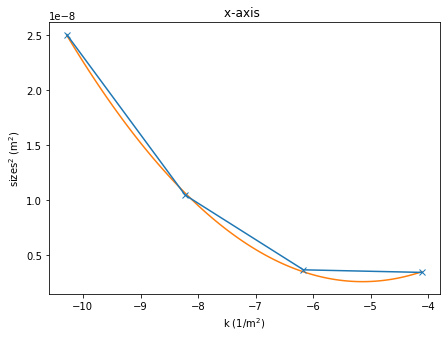

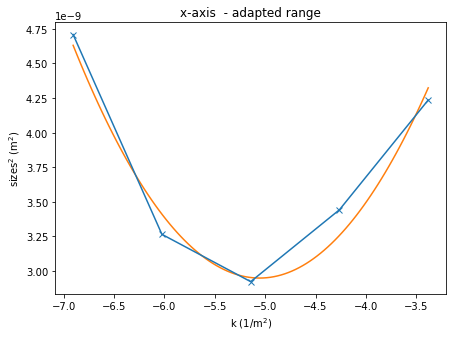

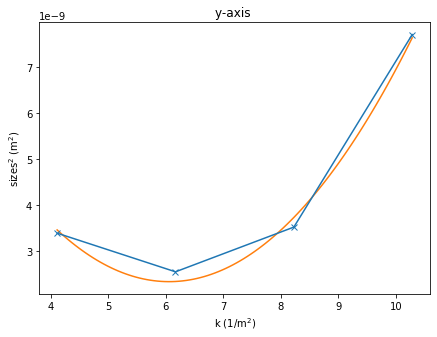

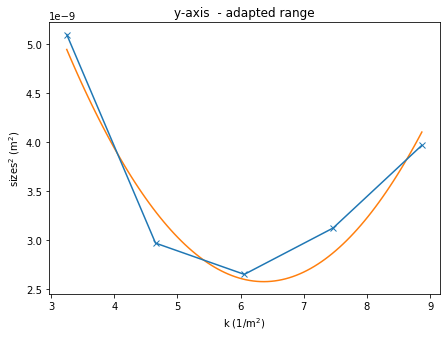

nemitx: 0.58, nemity: 0.38
nemitx_err: 0.03, nemity_err: 0.03
bmagx: 4.16, bmagy: 1.53
bmagx_err: 0.90, bmagy_err: 0.43


In [5]:
emittance = get_normemit(0.135, quad_list, quad_list, np.array(xrms), np.array(yrms), np.array(xrms_err), np.array(yrms_err), \
                           adapt_ranges=True, num_points=5, show_plots=True)

In [6]:
np.sqrt(0.58*0.38)

0.4694677837722201

## Using images

In [5]:
# example init quad list
quad_list = [-5, -4, -3, -2]
xrms = []
yrms = []
xrms_err = []
yrms_err = []

for quad in quad_list:
    setquad(quad)
    time.sleep(3)
    beamsize = get_updated_beamsizes(quad, use_profMon=False) 
    xrms.append(beamsize[0])
    yrms.append(beamsize[1])
    xrms_err.append(beamsize[2])
    yrms_err.append(beamsize[3])
    
emittance = get_normemit(0.135, quad_list, quad_list, np.array(xrms), np.array(yrms), np.array(xrms_err), np.array(yrms_err), \
                           adapt_ranges=True, num_points=5, show_plots=True)

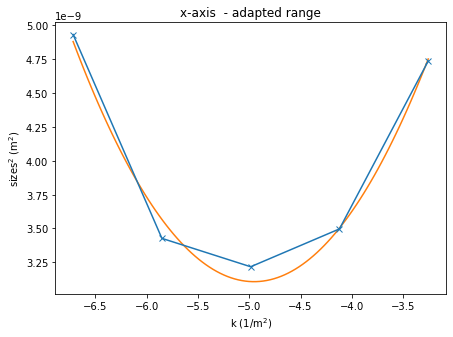

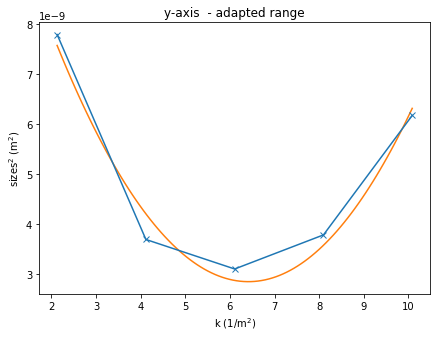

nemitx: 0.64, nemity: 0.41
nemitx_err: 0.02, nemity_err: 0.02
bmagx: 4.30, bmagy: 1.50
bmagx_err: 0.58, bmagy_err: 0.28


In [6]:
emittance = get_normemit(0.135, quad_list, quad_list, np.array(xrms), np.array(yrms), np.array(xrms_err), np.array(yrms_err), \
                           adapt_ranges=True, num_points=5, show_plots=True)

In [7]:
np.sqrt(0.64*0.41)

0.5122499389946279

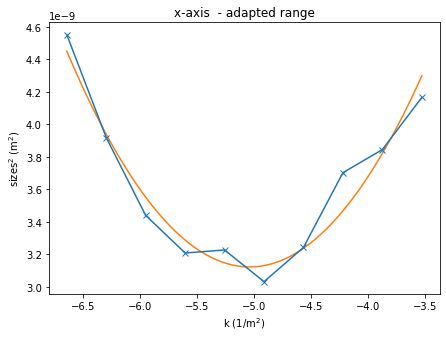

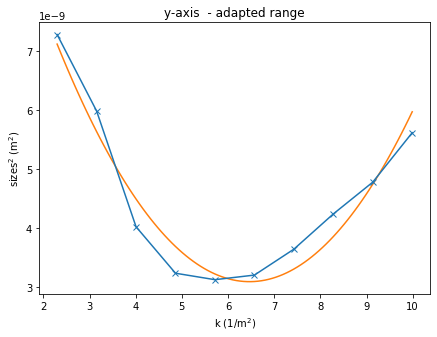

nemitx: 0.61, nemity: 0.41
nemitx_err: 0.03, nemity_err: 0.01
bmagx: 4.15, bmagy: 1.41
bmagx_err: 0.62, bmagy_err: 0.21


In [8]:
# example init quad list
quad_list = [-5, -4, -3, -2]
xrms = []
yrms = []
xrms_err = []
yrms_err = []

for quad in quad_list:
    setquad(quad)
    time.sleep(3)
    beamsize = get_updated_beamsizes(quad, use_profMon=False) 
    xrms.append(beamsize[0])
    yrms.append(beamsize[1])
    xrms_err.append(beamsize[2])
    yrms_err.append(beamsize[3])
    
emittance = get_normemit(0.135, quad_list, quad_list, np.array(xrms), np.array(yrms), np.array(xrms_err), np.array(yrms_err), \
                           adapt_ranges=True, num_points=10, show_plots=True)

In [9]:
np.sqrt(0.61*0.41)

0.5000999900019995

Beam too large.


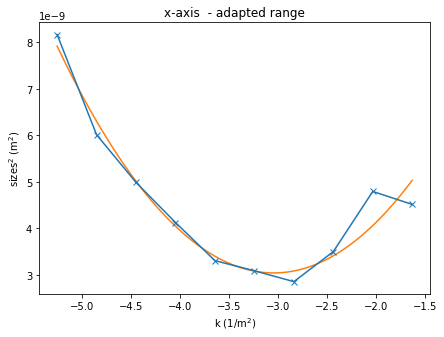

Cannot adapt quad ranges, complex root encountered.
Error: Cannot adapt quad ranges. Returning original fit.


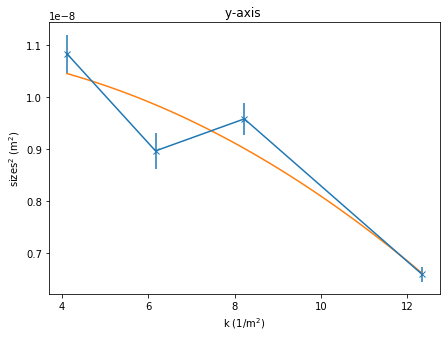

In [14]:
# w/ solenoid at 0.465
# example init quad list
quad_list = [-6, -4, -3, -2]
xrms = []
yrms = []
xrms_err = []
yrms_err = []

for quad in quad_list:
    setquad(quad)
    time.sleep(3)
    beamsize = get_updated_beamsizes(quad, use_profMon=False) 
    xrms.append(beamsize[0])
    yrms.append(beamsize[1])
    xrms_err.append(beamsize[2])
    yrms_err.append(beamsize[3])
    
emittance = get_normemit(0.135, quad_list, quad_list, np.array(xrms), np.array(yrms), np.array(xrms_err), np.array(yrms_err), \
                           adapt_ranges=True, num_points=10, show_plots=True)

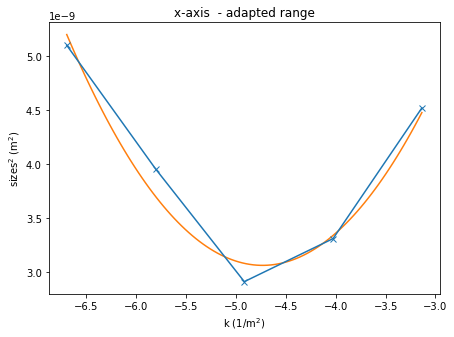

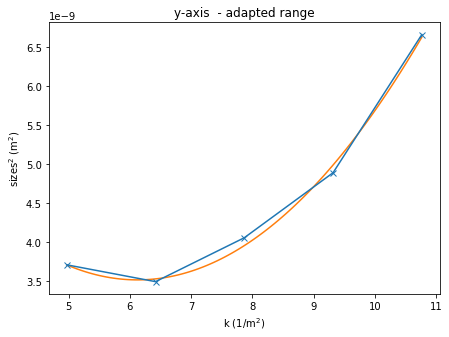

nemitx: 0.63, nemity: 0.34
nemitx_err: 0.04, nemity_err: 0.02
bmagx: 4.18, bmagy: 1.17
bmagx_err: 0.98, bmagy_err: 0.21


In [11]:
# w/ solenoid at 0.47
# example init quad list
quad_list = [-5, -4, -3, -2]
xrms = []
yrms = []
xrms_err = []
yrms_err = []

for quad in quad_list:
    setquad(quad)
    time.sleep(3)
    beamsize = get_updated_beamsizes(quad, use_profMon=False) 
    xrms.append(beamsize[0])
    yrms.append(beamsize[1])
    xrms_err.append(beamsize[2])
    yrms_err.append(beamsize[3])
    
emittance = get_normemit(0.135, quad_list, quad_list, np.array(xrms), np.array(yrms), np.array(xrms_err), np.array(yrms_err), \
                           adapt_ranges=True, num_points=5, show_plots=True)

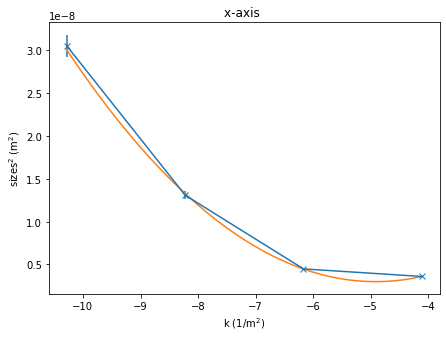

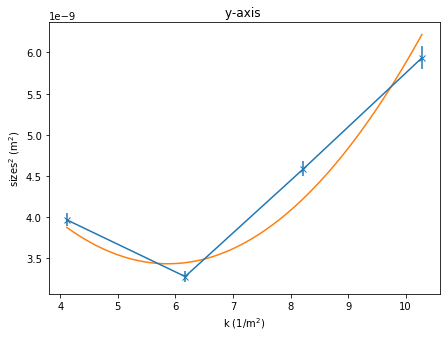

nemitx: 0.80, nemity: 0.34
nemitx_err: 0.02, nemity_err: 0.01
bmagx: 5.55, bmagy: 1.16
bmagx_err: 0.48, bmagy_err: 0.15


In [12]:
emittance = get_normemit(0.135, quad_list, quad_list, np.array(xrms), np.array(yrms), np.array(xrms_err), np.array(yrms_err), \
                           adapt_ranges=False, num_points=5, show_plots=True)

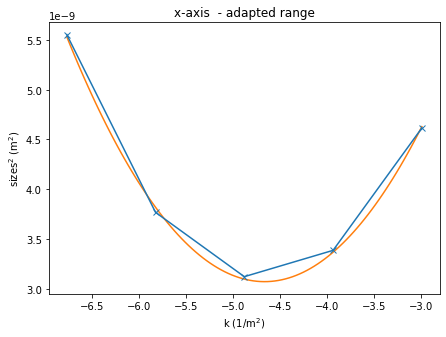

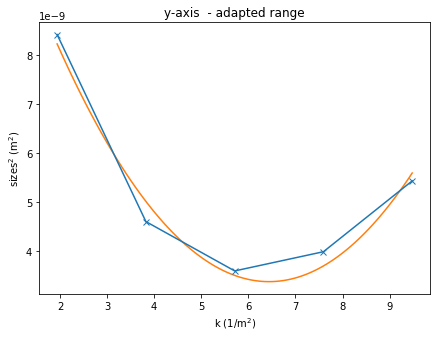

nemitx: 0.63, nemity: 0.43
nemitx_err: 0.01, nemity_err: 0.02
bmagx: 4.14, bmagy: 1.38
bmagx_err: 0.17, bmagy_err: 0.25


In [13]:
# w/ solenoid at 0.47
# example init quad list
quad_list = [-6, -4, -3, -2]
xrms = []
yrms = []
xrms_err = []
yrms_err = []

for quad in quad_list:
    setquad(quad)
    time.sleep(3)
    beamsize = get_updated_beamsizes(quad, use_profMon=False) 
    xrms.append(beamsize[0])
    yrms.append(beamsize[1])
    xrms_err.append(beamsize[2])
    yrms_err.append(beamsize[3])
    
emittance = get_normemit(0.135, quad_list, quad_list, np.array(xrms), np.array(yrms), np.array(xrms_err), np.array(yrms_err), \
                           adapt_ranges=True, num_points=5, show_plots=True)